## Exercise 11.3
Modify Code 11.5 to implement a simulator of the Game of Life CA. Simulate the dynamics from a random initial configuration. Measure the density of state 1’s in the configuration at each time step, and plot how the density changes over time. This can be done by creating an empty list in the "initialize" function, and then making the measurement and appending the result to the list in the "observe" function. The results stored in the list can be plotted manually after the simulation, or they could be plotted next to the visualization using pylab’s "subplot" function during the simulation.

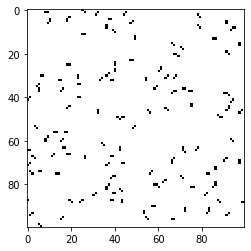

In [123]:
import matplotlib
import pylab
import matplotlib.pyplot as plt
import numpy as np

n = 100 # size of space: n x n
p = 0.1 # probability of initially dead cells

def initialize():
    global config, nextconfig
    config = pylab.zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if pylab.random() < p else 0
    nextconfig = pylab.zeros([n, n])
    
denslist=[]

def observe():
    global config, nextconfig
    pylab.cla()
    pylab.imshow(config, vmin = 0, vmax = 1, cmap = pylab.cm.binary)
    density =[]
    # Here, I obtained the density of the plot by taking the sum of all the plots that were filled and dividing
    # that by the total number of plots. Then, I took the average of those numbers and appended all of them
    # into an array named "denslist". This will be used to show the change in density with respect to time,
    # which will be displayed in a plot below.
    density.append(sum((sum(config==1)/(sum(config==1)+sum(config==0))))/len((sum(config==1)/(sum(config==1)+sum(config==0)))))
    denslist.append(density)

def update():
    density = []
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            # According to game of life, if the cell is dead, it'll become alive 
            # if there are exactly 3 alive cells around it
            if config[x, y] == 0: 
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        count += config[(x + dx) % n, (y + dy) % n]
                if count == 3:
                    nextconfig[x, y] = 1 
                else:
                    nextconfig[x, y] = 0
            # On the other hand, if the cell is alive, it'll stay alive 
            # if there are 2 or 3 alive cells around it
            else:
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        count += config[(x + dx) % n, (y + dy) % n]
                if count == (2 or 3):
                    nextconfig[x, y] = 1 
                else:
                    nextconfig[x, y] = 0
    config, nextconfig = nextconfig, config

%matplotlib inline

initialize()
for i in range(10):
    update()
    observe()

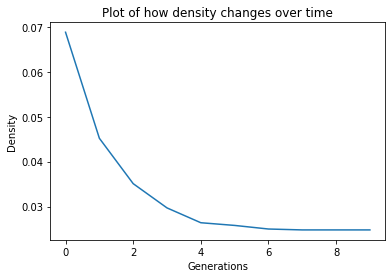

In [124]:
# Here is the plot of how density changes over time, as aforementioned.

plt.title('Plot of how density changes over time')
plt.xlabel("Generations")
plt.ylabel("Density")
plt.plot(denslist)

## Exercise 11.5
Implement an interactive parameter setter for $p$ in Code 11.5. Then conduct systematic simulations with varying $p$, and identify its critical value below which isolated clusters are formed but above which the whole space is filled with panic.

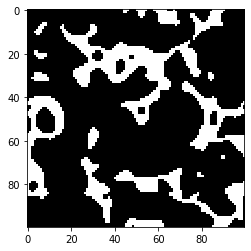

In [126]:
import matplotlib
import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as ani

n = 100 # size of space: n x n
p = 0.35
# probability of initially panicky individuals

def initialize():
    global config, nextconfig
    config = pylab.zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if pylab.random() < p else 0
    nextconfig = pylab.zeros([n, n])


def observe():
    global config, nextconfig
    pylab.cla()
    pylab.imshow(config, vmin = 0, vmax = 1, cmap = pylab.cm.binary)

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config

%matplotlib inline

initialize()
for j in range(10):
    update()
    observe()

#### Around which value of the initial density parameter does the phase transition (the whole space getting filled with panic) happen?

Around the values of $p = 0.35$ to $p = 0.45$. This is known as the critical density of the system that divides a calm state from a fully-panic state.